In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
x = pd.Series(range(10, 20))

y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [4]:
x.corr(y)

0.7586402890911867

In [5]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})

xy.corr()

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


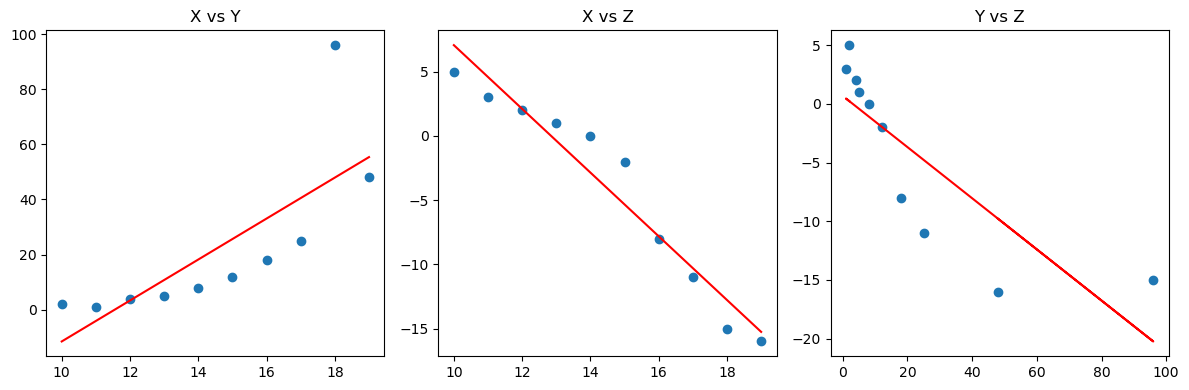

In [6]:
# Change the size of the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot the data
axes[0].scatter(x, y)
# fits the best fitting line to the data
axes[0].plot(x,np.poly1d(np.polyfit(x, y, 1))(x), color='red')
#title
axes[0].set_title('X vs Y')


# plot the data
axes[1].scatter(x, z)
# fits the best fitting line to the data
axes[1].plot(x ,np.poly1d(np.polyfit(x, z, 1))(x), color='red')
#title
axes[1].set_title('X vs Z')

# plot the data
axes[2].scatter(y, z)
# fits the best fitting line to the data
axes[2].plot(y,np.poly1d(np.polyfit(y, z, 1))(y), color='red')
#title
axes[2].set_title('Y vs Z')

plt.tight_layout()
plt.show()


In [7]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values':z})

xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


   # Wrapper Feature Selection

In [8]:
from sklearn import datasets

boston = datasets.load_boston()

bos = pd.DataFrame(boston.data, columns = boston.feature_names)

bos['Price'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [10]:
bos.shape

(506, 14)

In [22]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [23]:
bos.duplicated().sum()

0

In [24]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

In [25]:
X = bos.drop("Price", axis=1)       # feature matrix
y = bos['Price']               # target feature

In [26]:
#importing the necessary libraries

! pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression

In [27]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)

sfs.k_feature_names_ 

('RM', 'PTRATIO', 'LSTAT')

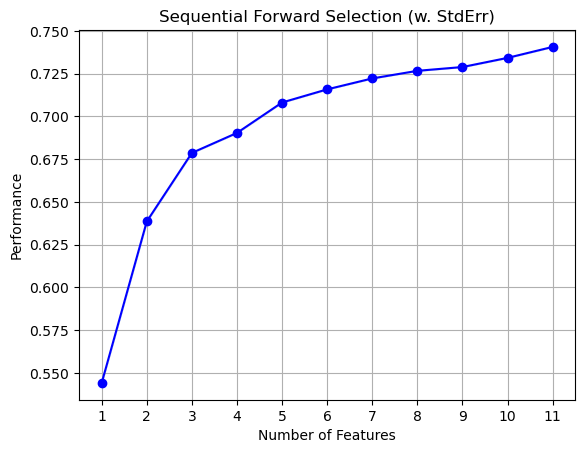

In [28]:
sfs1 = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [29]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(),
         k_features=5,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X, y)
sbs.k_feature_names_

('NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')

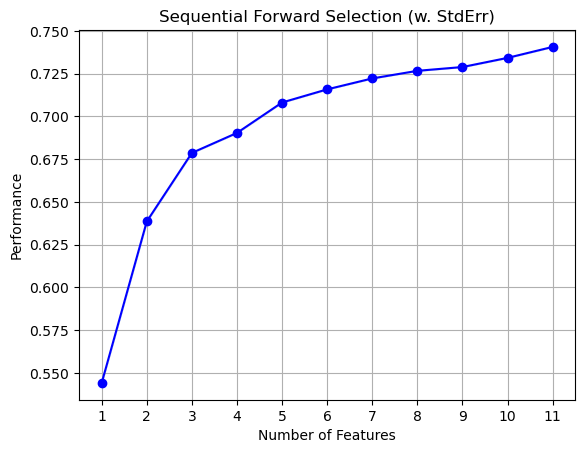

In [30]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [31]:
# sklearn library

from sklearn.feature_selection import SequentialFeatureSelector

In [32]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

In [33]:
sfs.get_feature_names_out(X.columns)

array(['CHAS', 'PTRATIO', 'LSTAT'], dtype=object)

In [34]:
new_features= pd.DataFrame(sfs.transform(X), columns= sfs.get_feature_names_out(X.columns))

new_features.head()

,CHAS,PTRATIO,LSTAT
0,0.0,15.3,4.98
1,0.0,17.8,9.14
2,0.0,17.8,4.03
3,0.0,18.7,2.94
4,0.0,18.7,5.33
